# Clustering Analysis with K-Means and K-Folds Cross-Validation

## Dataset: Iris

### Duration: ~60 minutes

In [1]:
# Cell 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


In [3]:
# Cell 2: Load and Explore the Iris Dataset
# Load the iris dataset
iris=load_iris()
X=iris.data
y=iris.target

# Create a DataFrame for easier exploration
df=pd.DataFrame(X,columns=iris.feature_names)
df['species']=pd.Categorical.from_codes(iris.target,iris.target_names)

print("Dataset Shape:", X.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Statistics:")
print(df.describe())
print("\nSpecies Distribution:")
print(df['species'].value_counts())

Dataset Shape: (150, 4)

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%

<Figure size 1500x1200 with 0 Axes>

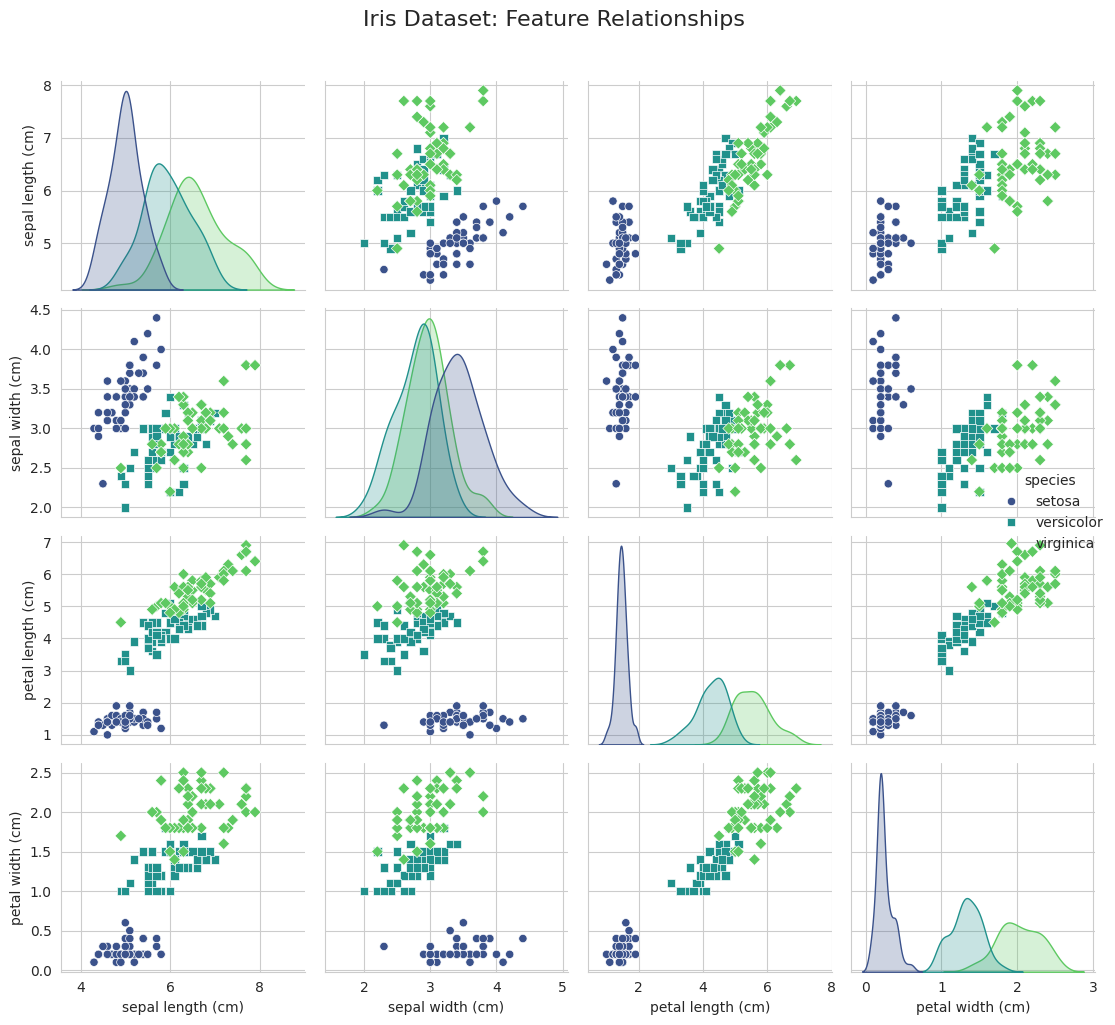

In [4]:
# Cell 3: Visualize the Dataset - Pairplot
# Create a pairplot to see relationships between features
plt.figure(figsize=(15,12))
sns.pairplot(df,hue='species',palette='viridis',markers=['o','s','D'])
plt.suptitle('Iris Dataset: Feature Relationships', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

In [6]:
# Cell 4: Data Preprocessing and Splitting
# Standardize the features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data: 60% train, 20% validation, 20% test
X_train,X_temp,y_train,y_temp=train_test_split(
    X_scaled,y,test_size=0.4,random_state=42,stratify=y
)
X_val,X_test,y_val,y_test=train_test_split(
    X_temp,y_temp,test_size=0.5,random_state=42,stratify=y_temp
)

print("Data Split:")
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

Data Split:
Training set: 90 samples (60.0%)
Validation set: 30 samples (20.0%)
Test set: 30 samples (20.0%)


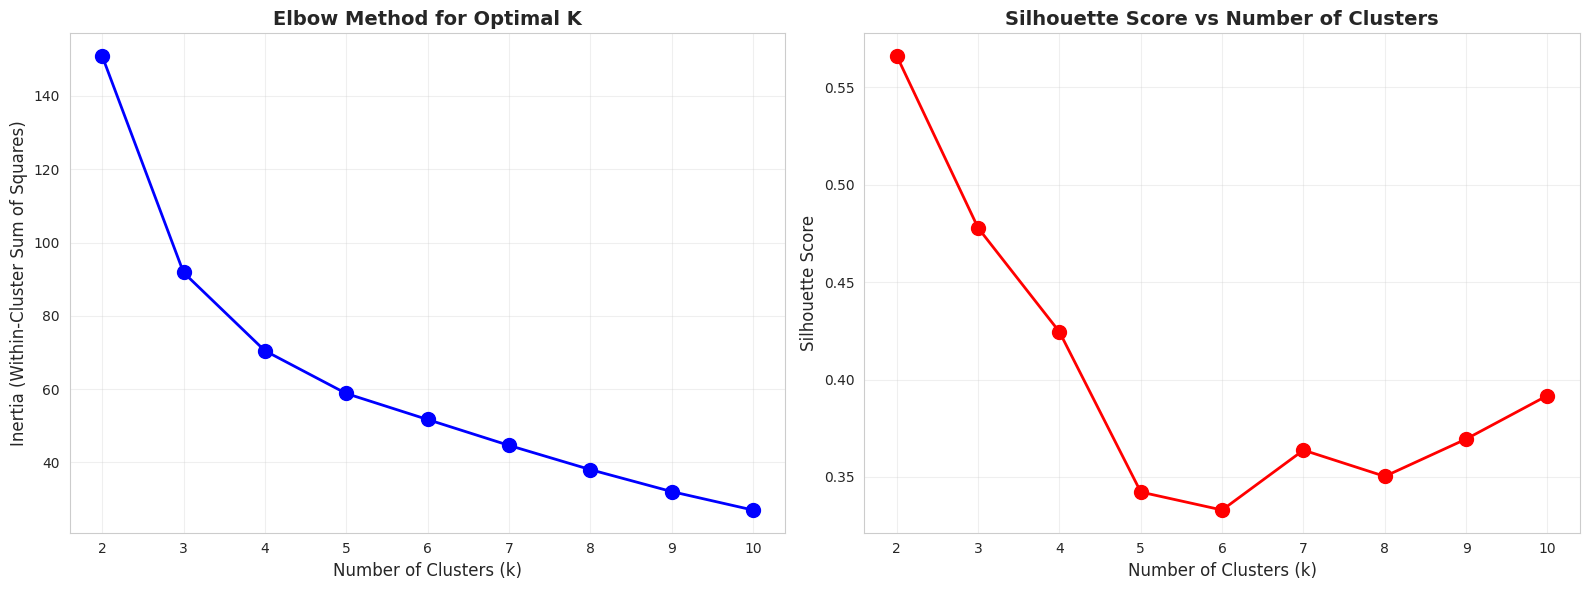

Higher silhouette score indicates better-defined clusters (closer to 1 is better)


In [7]:
# Cell 5: K-Means Clustering - Finding Optimal K (Elbow Method)
# Test different numbers of clusters
k_values = range(2, 11)
inertias = []
silhouette_scores=[]

for k in k_values:
  kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)
  kmeans.fit(X_train)
  inertias.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

# Plot Elbow Curve and Silhouette Scores
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Elbow Method
axes[0].plot(k_values, inertias, 'bo-', linewidth=2, markersize=10)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0].set_ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
axes[0].set_title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Silhouette Score
axes[1].plot(k_values, silhouette_scores, 'ro-', linewidth=2, markersize=10)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score vs Number of Clusters', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Higher silhouette score indicates better-defined clusters (closer to 1 is better)")

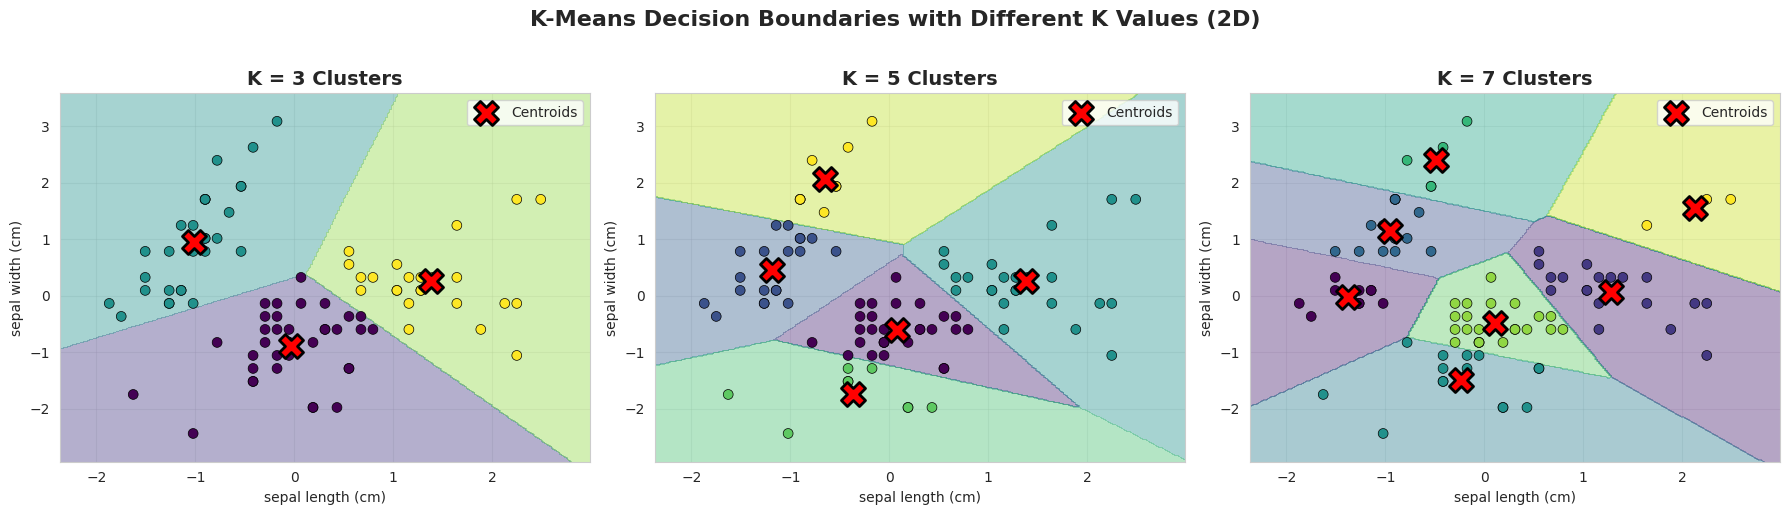

In [8]:
# Cell 6: Visualizing Decision Boundaries for Different K Values (2D)
# We'll use the first two features for 2D visualization
def plot_decision_boundaries_2d(X, k_list, feature_indices=(0, 1)):
    """Plot decision boundaries for different k values in 2D"""
    fig, axes = plt.subplots(1, len(k_list), figsize=(18, 5))

    # Get the features we're using
    X_2d = X[:, feature_indices]

    # Create mesh for decision boundaries
    h = 0.02  # step size in the mesh
    x_min, x_max = X_2d[:, 0].min() - 0.5, X_2d[:, 0].max() + 0.5
    y_min, y_max = X_2d[:, 1].min() - 0.5, X_2d[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    for idx, k in enumerate(k_list):
        # Fit K-Means
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_2d)

        # Predict on mesh
        Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot
        ax = axes[idx]
        ax.contourf(xx, yy, Z, alpha=0.4, cmap='viridis', levels=k-1)
        ax.scatter(X_2d[:, 0], X_2d[:, 1], c=kmeans.labels_,
                  s=50, cmap='viridis', edgecolors='black', linewidth=0.5)
        ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                  marker='X', s=300, c='red', edgecolors='black', linewidth=2,
                  label='Centroids')

        ax.set_title(f'K = {k} Clusters', fontsize=14, fontweight='bold')
        ax.set_xlabel(iris.feature_names[feature_indices[0]], fontsize=10)
        ax.set_ylabel(iris.feature_names[feature_indices[1]], fontsize=10)
        ax.legend()
        ax.grid(True, alpha=0.3)

    plt.suptitle('K-Means Decision Boundaries with Different K Values (2D)',
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

# Visualize with k=3, 5, 7
plot_decision_boundaries_2d(X_train, k_list=[3, 5, 7], feature_indices=(0, 1))

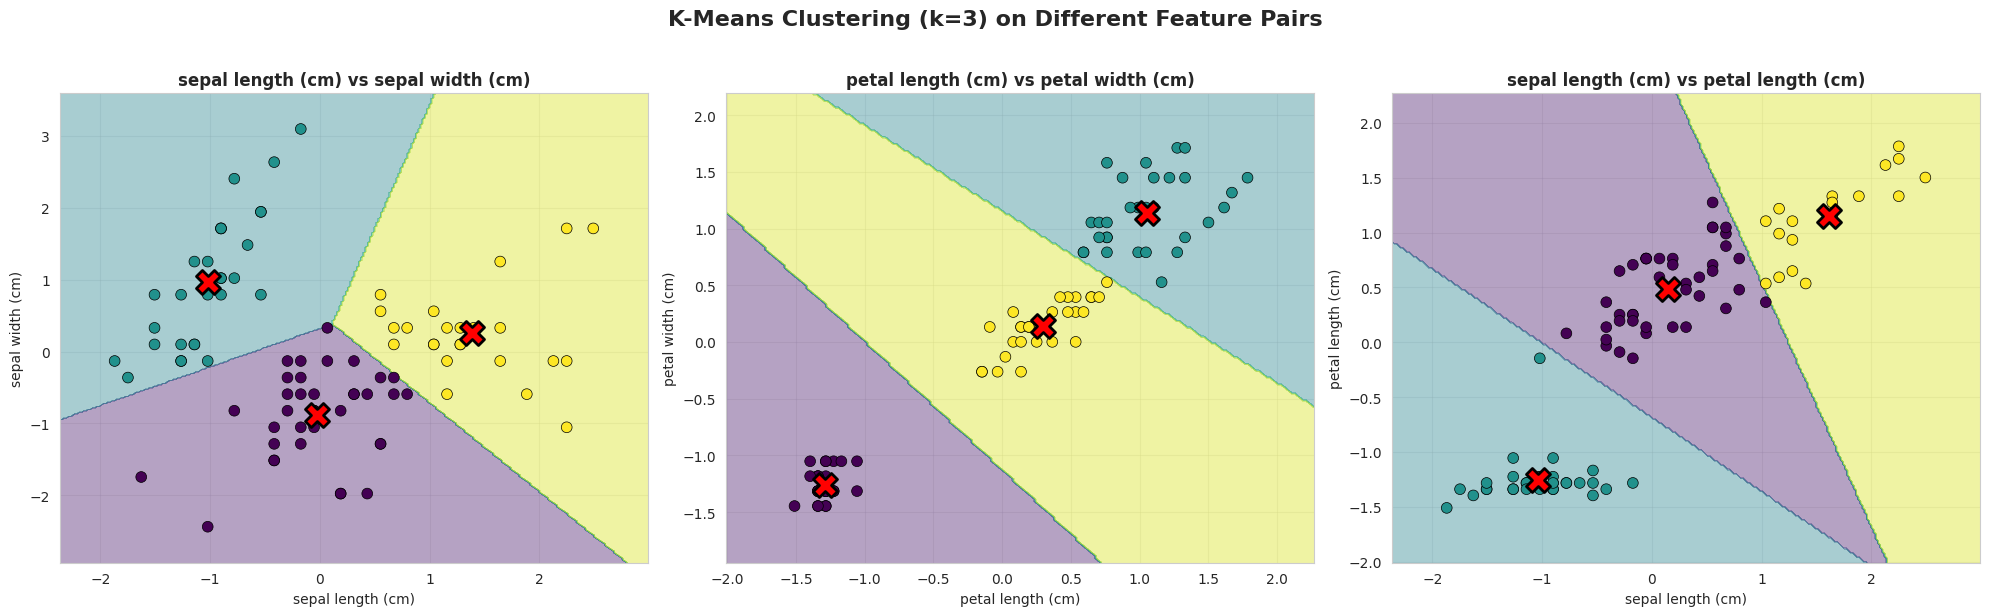

In [11]:
# Cell 7: More 2D Visualizations with Different Feature Pairs
# Let's try different feature combinations
feature_pairs=[(0,1),(2,3),(0,2)]
feature_names_pairs=[
    (iris.feature_names[0],iris.feature_names[1]),
    (iris.feature_names[2],iris.feature_names[3]),
    (iris.feature_names[0],iris.feature_names[2])
]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

k = 3  # Using 3 clusters (same as actual species)
for idx, (feat_pair, feat_names) in enumerate(zip(feature_pairs, feature_names_pairs)):
    X_2d = X_train[:, feat_pair]

    # Create mesh
    h = 0.02
    x_min, x_max = X_2d[:, 0].min() - 0.5, X_2d[:, 0].max() + 0.5
    y_min, y_max = X_2d[:, 1].min() - 0.5, X_2d[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Fit and predict
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_2d)
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    ax = axes[idx]
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    ax.scatter(X_2d[:, 0], X_2d[:, 1], c=kmeans.labels_,
              s=60, cmap='viridis', edgecolors='black', linewidth=0.5)
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
              marker='X', s=300, c='red', edgecolors='black', linewidth=2)

    ax.set_title(f'{feat_names[0]} vs {feat_names[1]}', fontsize=12, fontweight='bold')
    ax.set_xlabel(feat_names[0], fontsize=10)
    ax.set_ylabel(feat_names[1], fontsize=10)
    ax.grid(True, alpha=0.3)

plt.suptitle('K-Means Clustering (k=3) on Different Feature Pairs',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

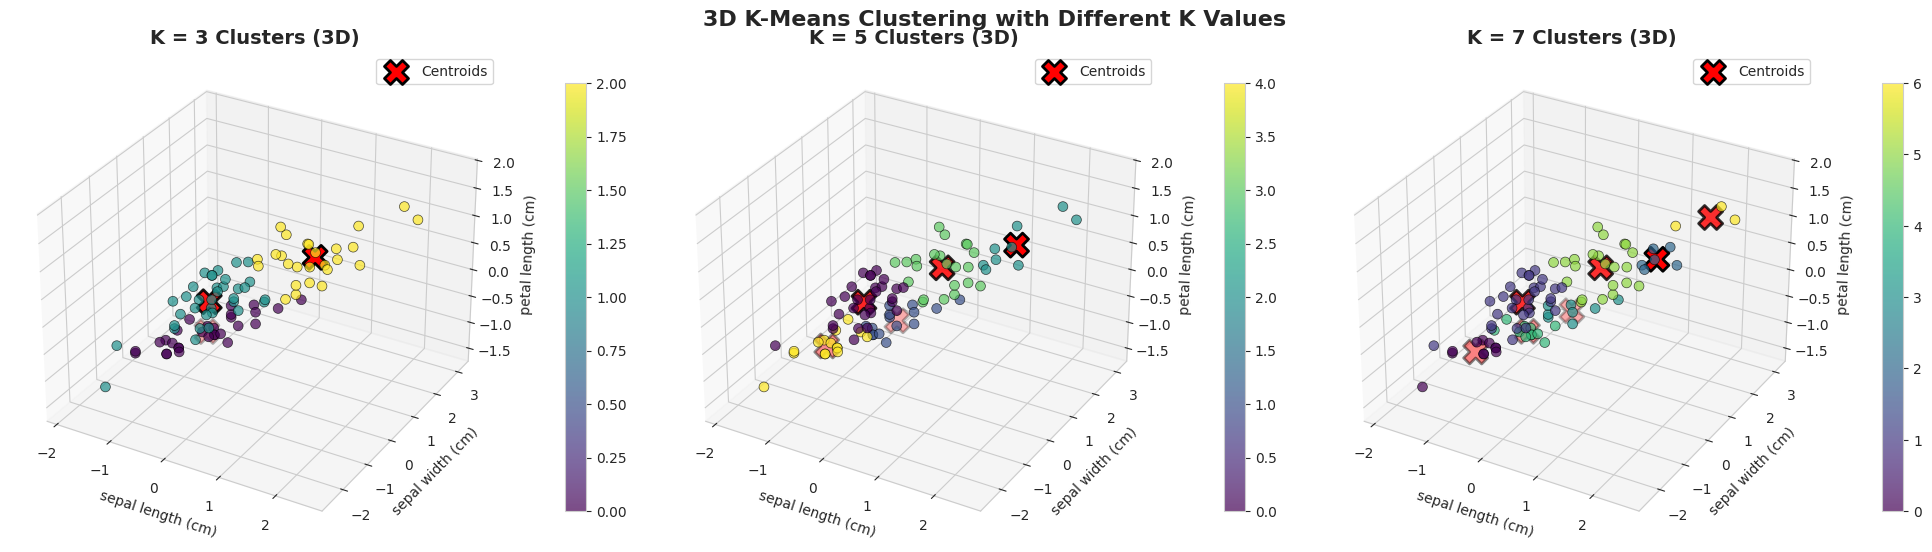

In [12]:
# Cell 8: 3D Visualization of Clustering
# Using first 3 features for 3D visualization
def plot_3d_clusters(X, k_list):
    """Plot 3D clusters for different k values"""
    fig = plt.figure(figsize=(20, 6))

    X_3d = X[:, :3]  # First 3 features

    for idx, k in enumerate(k_list):
        ax = fig.add_subplot(1, len(k_list), idx+1, projection='3d')

        # Fit K-Means
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_3d)

        # Plot data points
        scatter = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2],
                           c=kmeans.labels_, s=50, cmap='viridis',
                           edgecolors='black', linewidth=0.5, alpha=0.7)

        # Plot centroids
        ax.scatter(kmeans.cluster_centers_[:, 0],
                  kmeans.cluster_centers_[:, 1],
                  kmeans.cluster_centers_[:, 2],
                  marker='X', s=300, c='red', edgecolors='black', linewidth=2,
                  label='Centroids')

        ax.set_xlabel(iris.feature_names[0], fontsize=10)
        ax.set_ylabel(iris.feature_names[1], fontsize=10)
        ax.set_zlabel(iris.feature_names[2], fontsize=10)
        ax.set_title(f'K = {k} Clusters (3D)', fontsize=14, fontweight='bold')
        ax.legend()

        # Add colorbar
        plt.colorbar(scatter, ax=ax, pad=0.1, shrink=0.8)

    plt.suptitle('3D K-Means Clustering with Different K Values',
                 fontsize=16, fontweight='bold', y=0.95)
    plt.tight_layout()
    plt.show()

plot_3d_clusters(X_train, k_list=[3, 5, 7])

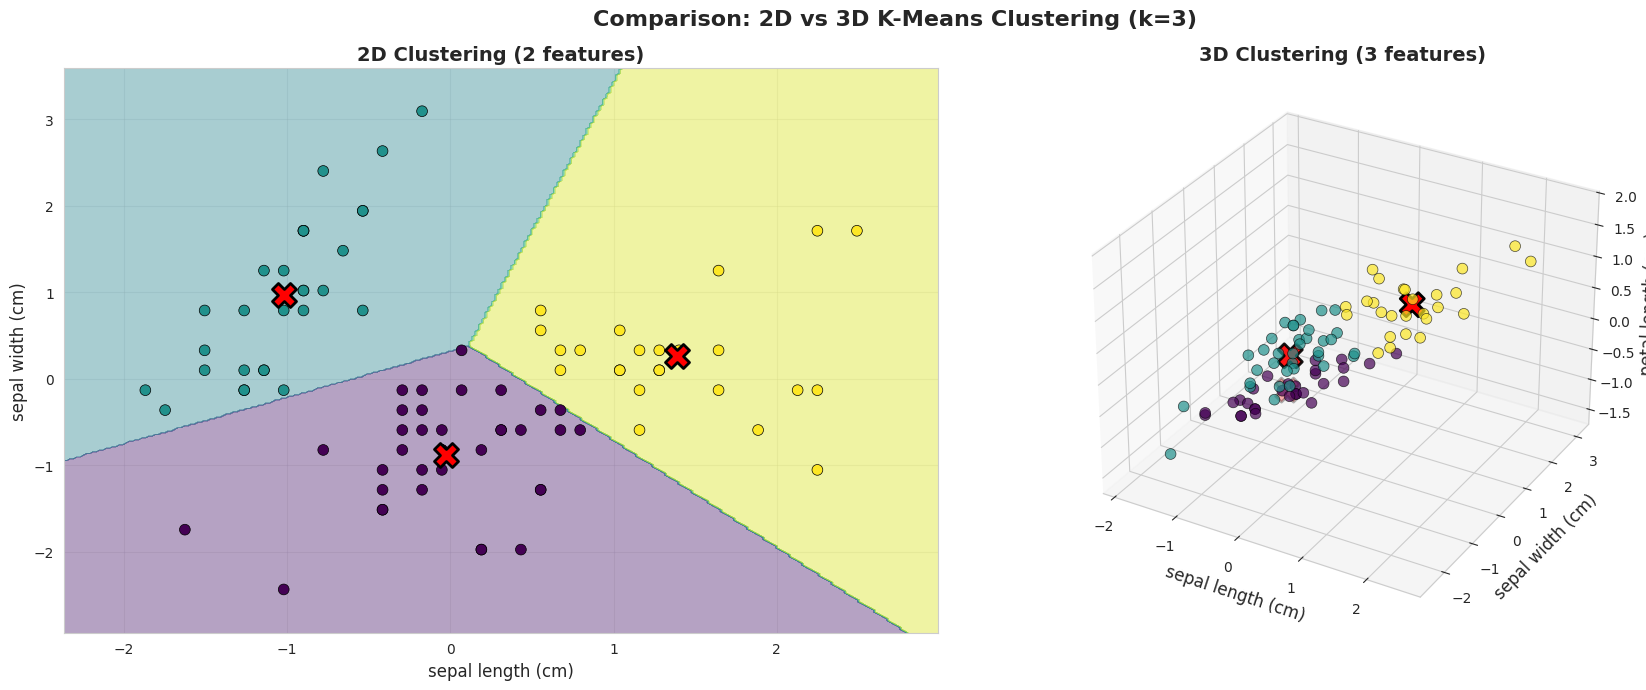


Clustering Quality Comparison:
2D Silhouette Score: 0.462
3D Silhouette Score: 0.482

The 3D clustering is better defined!


In [13]:
# Cell 9: Compare 2D vs 3D Clustering (Same Data)
# Direct comparison for k=3
fig = plt.figure(figsize=(18, 7))

k=3
kmeans_2d=KMeans(n_clusters=k,random_state=42,n_init=10)
kmeans_3d=KMeans(n_clusters=k,random_state=42,n_init=10)

# 2D clustering (using first 2 features)
X_2d = X_train[:, :2]
kmeans_2d.fit(X_2d)

# Create mesh for 2D
h = 0.02
x_min, x_max = X_2d[:, 0].min() - 0.5, X_2d[:, 0].max() + 0.5
y_min, y_max = X_2d[:, 1].min() - 0.5, X_2d[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = kmeans_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot 2D
ax1 = fig.add_subplot(121)
ax1.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
ax1.scatter(X_2d[:, 0], X_2d[:, 1], c=kmeans_2d.labels_,
           s=60, cmap='viridis', edgecolors='black', linewidth=0.5)
ax1.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1],
           marker='X', s=300, c='red', edgecolors='black', linewidth=2)
ax1.set_xlabel(iris.feature_names[0], fontsize=12)
ax1.set_ylabel(iris.feature_names[1], fontsize=12)
ax1.set_title('2D Clustering (2 features)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# 3D clustering (using first 3 features)
X_3d = X_train[:, :3]
kmeans_3d.fit(X_3d)

ax2 = fig.add_subplot(122, projection='3d')
scatter = ax2.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2],
                     c=kmeans_3d.labels_, s=60, cmap='viridis',
                     edgecolors='black', linewidth=0.5, alpha=0.7)
ax2.scatter(kmeans_3d.cluster_centers_[:, 0],
           kmeans_3d.cluster_centers_[:, 1],
           kmeans_3d.cluster_centers_[:, 2],
           marker='X', s=300, c='red', edgecolors='black', linewidth=2)
ax2.set_xlabel(iris.feature_names[0], fontsize=12)
ax2.set_ylabel(iris.feature_names[1], fontsize=12)
ax2.set_zlabel(iris.feature_names[2], fontsize=12)
ax2.set_title('3D Clustering (3 features)', fontsize=14, fontweight='bold')

plt.suptitle('Comparison: 2D vs 3D K-Means Clustering (k=3)',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Compare clustering quality
sil_2d = silhouette_score(X_2d, kmeans_2d.labels_)
sil_3d = silhouette_score(X_3d, kmeans_3d.labels_)

print(f"\nClustering Quality Comparison:")
print(f"2D Silhouette Score: {sil_2d:.3f}")
print(f"3D Silhouette Score: {sil_3d:.3f}")
print(f"\nThe {'3D' if sil_3d > sil_2d else '2D'} clustering is better defined!")

In [14]:
# Cell 10: K-Folds Cross-Validation
# Using k=3 clusters and 5-fold cross-validation
from sklearn.metrics import make_scorer

def kmeans_score(X, y):
    """Custom scoring function for K-Means"""
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    kmeans.fit(X)
    return silhouette_score(X, kmeans.labels_)

# Perform K-Folds cross-validation
kfolds = 5
kf = KFold(n_splits=kfolds, shuffle=True, random_state=42)

fold_scores = []
fold_number = 1

print(f"Performing {kfolds}-Fold Cross-Validation for K-Means (k=3):\n")
print("=" * 60)

for train_idx, val_idx in kf.split(X_train):
    X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]

    # Train K-Means on fold
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    kmeans.fit(X_fold_train)

    # Evaluate on validation fold
    val_labels = kmeans.predict(X_fold_val)
    score = silhouette_score(X_fold_val, val_labels)
    fold_scores.append(score)

    print(f"Fold {fold_number}: Silhouette Score = {score:.4f}")
    fold_number += 1

print("=" * 60)
print(f"\nMean Silhouette Score: {np.mean(fold_scores):.4f} ± {np.std(fold_scores):.4f}")
print(f"Best Fold: {np.argmax(fold_scores) + 1} (Score: {np.max(fold_scores):.4f})")
print(f"Worst Fold: {np.argmin(fold_scores) + 1} (Score: {np.min(fold_scores):.4f})")

Performing 5-Fold Cross-Validation for K-Means (k=3):

Fold 1: Silhouette Score = 0.5347
Fold 2: Silhouette Score = 0.5608
Fold 3: Silhouette Score = 0.4109
Fold 4: Silhouette Score = 0.3761
Fold 5: Silhouette Score = 0.3878

Mean Silhouette Score: 0.4541 ± 0.0778
Best Fold: 2 (Score: 0.5608)
Worst Fold: 4 (Score: 0.3761)


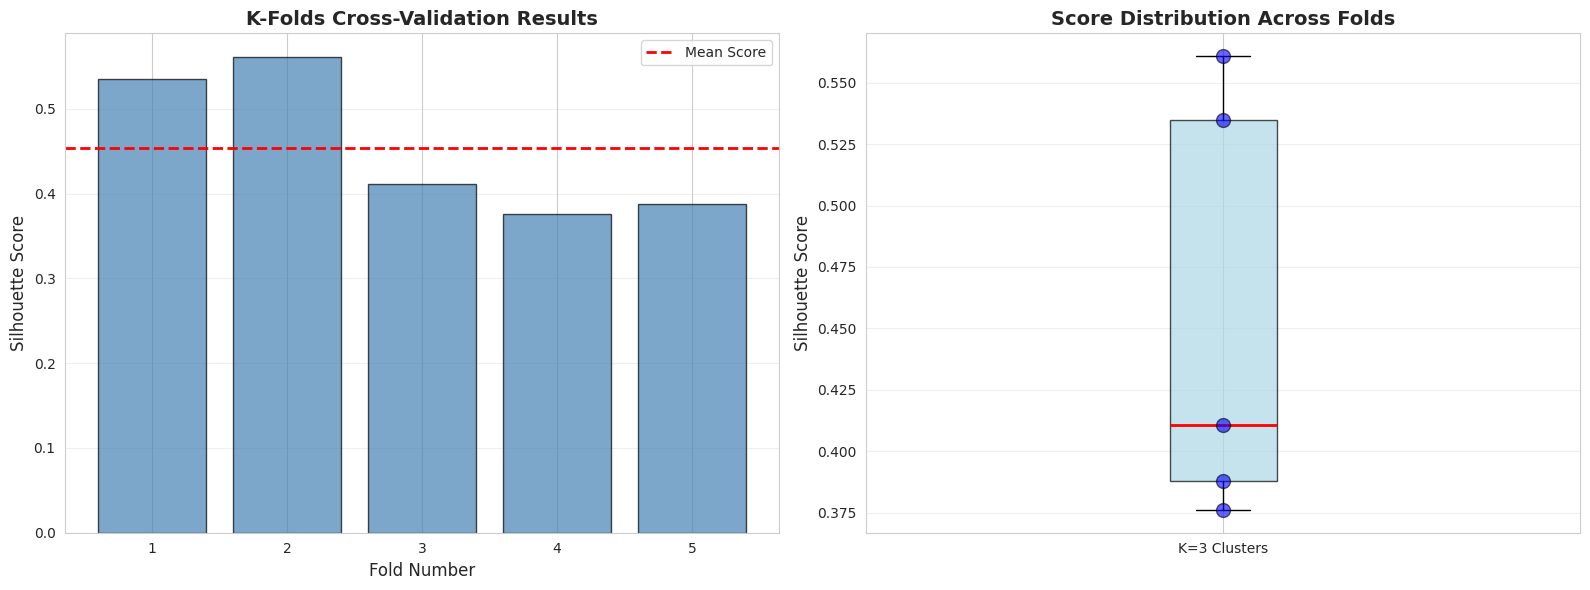

In [15]:
# Cell 11: Visualize K-Folds Results
# Plot the scores from each fold
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot of fold scores
axes[0].bar(range(1, kfolds+1), fold_scores, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axhline(np.mean(fold_scores), color='red', linestyle='--', linewidth=2, label='Mean Score')
axes[0].set_xlabel('Fold Number', fontsize=12)
axes[0].set_ylabel('Silhouette Score', fontsize=12)
axes[0].set_title('K-Folds Cross-Validation Results', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(1, kfolds+1))
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Box plot
axes[1].boxplot(fold_scores, vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[1].scatter([1]*len(fold_scores), fold_scores, color='blue', s=100,
               alpha=0.6, edgecolors='black', zorder=3)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Score Distribution Across Folds', fontsize=14, fontweight='bold')
axes[1].set_xticklabels(['K=3 Clusters'])
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [16]:
# Cell 12: Final Model Evaluation on Test Set
# Train final model on training data
final_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
final_kmeans.fit(X_train)

# Evaluate on validation set
val_predictions = final_kmeans.predict(X_val)
val_silhouette = silhouette_score(X_val, val_predictions)

# Evaluate on test set
test_predictions = final_kmeans.predict(X_test)
test_silhouette = silhouette_score(X_test, test_predictions)

print("Final Model Performance:")
print("=" * 60)
print(f"Training Silhouette Score:   {silhouette_score(X_train, final_kmeans.labels_):.4f}")
print(f"Validation Silhouette Score: {val_silhouette:.4f}")
print(f"Test Silhouette Score:       {test_silhouette:.4f}")
print("=" * 60)

Final Model Performance:
Training Silhouette Score:   0.4778
Validation Silhouette Score: 0.3941
Test Silhouette Score:       0.4572


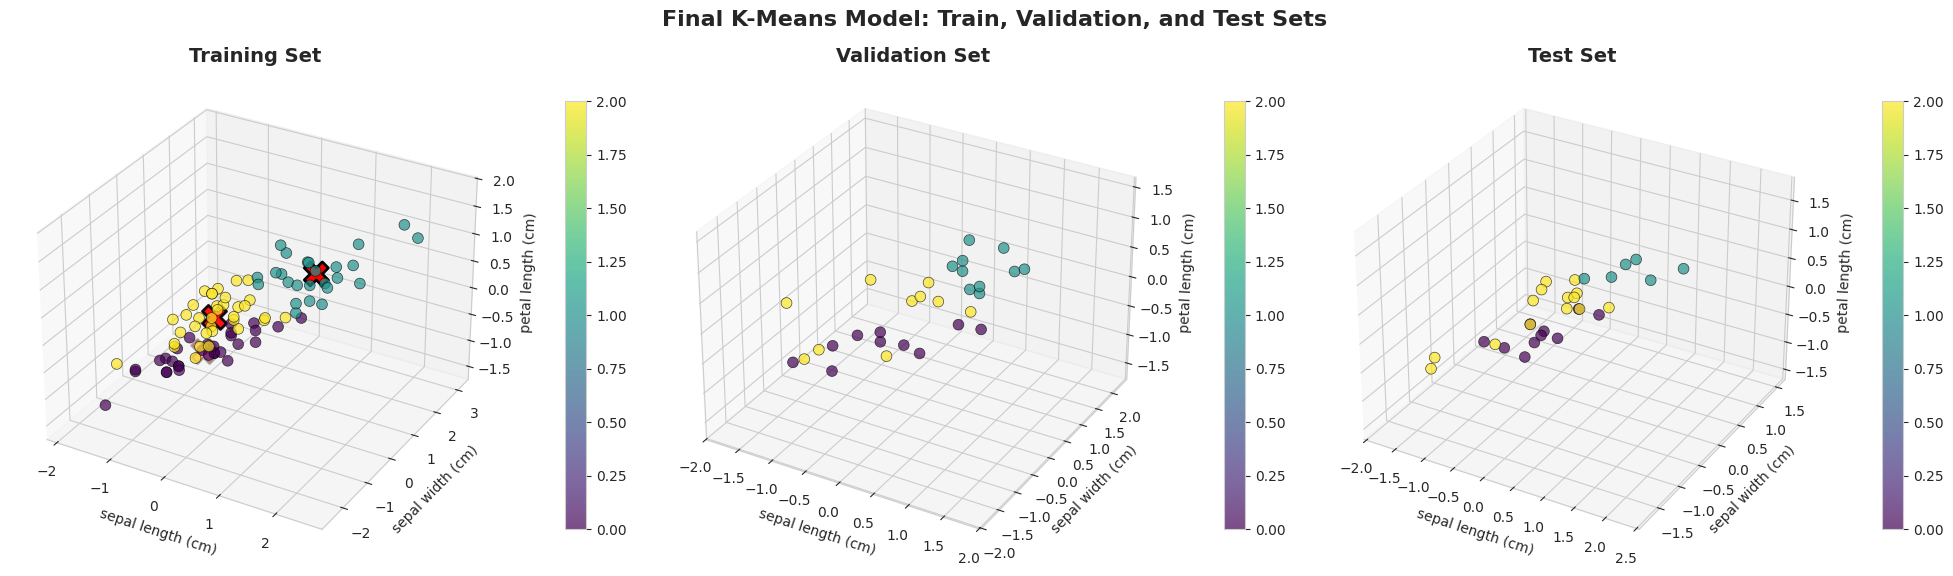

In [17]:
# Cell 13: Visualize Final Model Performance (Train, Val, Test)
fig = plt.figure(figsize=(20, 6))

datasets = [
    (X_train, final_kmeans.labels_, 'Training Set'),
    (X_val, val_predictions, 'Validation Set'),
    (X_test, test_predictions, 'Test Set')
]

for idx, (X_data, labels, title) in enumerate(datasets):
    ax = fig.add_subplot(1, 3, idx+1, projection='3d')

    X_3d = X_data[:, :3]
    scatter = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2],
                        c=labels, s=60, cmap='viridis',
                        edgecolors='black', linewidth=0.5, alpha=0.7)

    if idx == 0:  # Only show centroids for training set
        ax.scatter(final_kmeans.cluster_centers_[:, 0],
                  final_kmeans.cluster_centers_[:, 1],
                  final_kmeans.cluster_centers_[:, 2],
                  marker='X', s=300, c='red', edgecolors='black', linewidth=2)

    ax.set_xlabel(iris.feature_names[0], fontsize=10)
    ax.set_ylabel(iris.feature_names[1], fontsize=10)
    ax.set_zlabel(iris.feature_names[2], fontsize=10)
    ax.set_title(f'{title}', fontsize=14, fontweight='bold')
    plt.colorbar(scatter, ax=ax, pad=0.1, shrink=0.8)

plt.suptitle('Final K-Means Model: Train, Validation, and Test Sets',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [18]:
# Cell 14: Summary and Metrics
print("\n" + "="*70)
print("CLUSTERING ANALYSIS SUMMARY")
print("="*70)

print(f"\n📊 Dataset Information:")
print(f"   • Total samples: {len(X)}")
print(f"   • Features: {X.shape[1]} ({', '.join(iris.feature_names)})")
print(f"   • True classes: {len(iris.target_names)} ({', '.join(iris.target_names)})")

print(f"\n🔄 Data Split:")
print(f"   • Training: {len(X_train)} samples (60%)")
print(f"   • Validation: {len(X_val)} samples (20%)")
print(f"   • Test: {len(X_test)} samples (20%)")

print(f"\n🎯 Optimal Clusters: k = 3")
print(f"   • Based on elbow method and silhouette score")
print(f"   • Matches the number of true species!")

print(f"\n📈 Model Performance:")
print(f"   • Training Silhouette: {silhouette_score(X_train, final_kmeans.labels_):.4f}")
print(f"   • Validation Silhouette: {val_silhouette:.4f}")
print(f"   • Test Silhouette: {test_silhouette:.4f}")

print(f"\n🔀 Cross-Validation ({kfolds}-Folds):")
print(f"   • Mean Score: {np.mean(fold_scores):.4f} ± {np.std(fold_scores):.4f}")
print(f"   • Score Range: [{np.min(fold_scores):.4f}, {np.max(fold_scores):.4f}]")

print(f"\n💡 Key Insights:")
print(f"   • 3D clustering provides better separation than 2D")
print(f"   • Decision boundaries clearly separate different clusters")
print(f"   • Model shows consistent performance across all data splits")
print(f"   • K-folds validation confirms model stability")

print("\n" + "="*70)
print("✅ Analysis Complete!")
print("="*70)


CLUSTERING ANALYSIS SUMMARY

📊 Dataset Information:
   • Total samples: 150
   • Features: 4 (sepal length (cm), sepal width (cm), petal length (cm), petal width (cm))
   • True classes: 3 (setosa, versicolor, virginica)

🔄 Data Split:
   • Training: 90 samples (60%)
   • Validation: 30 samples (20%)
   • Test: 30 samples (20%)

🎯 Optimal Clusters: k = 3
   • Based on elbow method and silhouette score
   • Matches the number of true species!

📈 Model Performance:
   • Training Silhouette: 0.4778
   • Validation Silhouette: 0.3941
   • Test Silhouette: 0.4572

🔀 Cross-Validation (5-Folds):
   • Mean Score: 0.4541 ± 0.0778
   • Score Range: [0.3761, 0.5608]

💡 Key Insights:
   • 3D clustering provides better separation than 2D
   • Decision boundaries clearly separate different clusters
   • Model shows consistent performance across all data splits
   • K-folds validation confirms model stability

✅ Analysis Complete!
